In [4]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

# function to easily plot scatter plots with linear regression. 

def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()

In [5]:

filepath = os.path.join("Output_Data", "combined_data_2014_2015.csv")

combined_data_df = pd.read_csv(filepath)

combined_data_df.head()

# PLOT stuff

,Unnamed: 0,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,...,snow_3h,clouds_all,weather_main,weather_description,Time,Date,Ride_count,Day_of_week,Month,Year
0,0,51.75,48.78,49.95,53.56,1016,46,4.70,0.0,0.0,...,0.0,1,Clear,sky is clear,0,2014-04-01,138,1,4,2014
1,1,49.32,45.91,48.00,51.76,1016,51,8.05,0.0,0.0,...,0.0,1,Clear,sky is clear,1,2014-04-01,66,1,4,2014
2,2,45.21,41.45,42.75,46.94,1017,54,6.93,0.0,0.0,...,0.0,1,Clear,sky is clear,2,2014-04-01,53,1,4,2014
3,3,41.61,35.10,40.26,43.95,1019,58,11.41,0.0,0.0,...,0.0,1,Clear,sky is clear,3,2014-04-01,93,1,4,2014
4,4,41.13,37.22,39.88,42.06,1019,54,5.82,0.0,0.0,...,0.0,1,Clear,sky is clear,4,2014-04-01,166,1,4,2014


In [57]:
sat_fullday_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 6)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0)] 

sat_fullday_2015

,Unnamed: 0,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,...,snow_3h,clouds_all,weather_main,weather_description,Time,Date,Ride_count,Day_of_week,Month,Year
4861,4861,50.65,49.73,49.98,51.96,1008,92,4.70,0.0,0.0,...,0.0,90,Mist,mist,19,2015-01-04,2442,6,1,2015
4862,4862,52.54,51.73,52.41,53.56,1007,90,8.05,0.0,0.0,...,0.0,90,Mist,mist,20,2015-01-04,2408,6,1,2015
4863,4863,54.46,53.56,53.58,55.02,1006,84,13.87,0.0,0.0,...,0.0,20,Mist,mist,21,2015-01-04,1948,6,1,2015
4864,4864,55.51,54.70,53.04,55.92,1005,84,6.93,0.0,0.0,...,0.0,20,Mist,mist,22,2015-01-04,1787,6,1,2015
4865,4865,55.51,54.75,53.04,55.92,1005,85,4.70,0.0,0.0,...,0.0,1,Mist,mist,23,2015-01-04,1443,6,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9452,9452,68.49,68.79,66.90,73.90,1006,80,0.00,0.0,0.0,...,0.0,90,Clouds,overcast clouds,19,2015-06-28,4287,6,6,2015
9453,9453,71.89,72.07,71.49,74.98,1006,70,3.36,0.0,0.0,...,0.0,75,Clouds,broken clouds,20,2015-06-28,4037,6,6,2015
9454,9454,72.18,72.43,69.96,73.90,1006,71,0.00,0.0,0.0,...,0.0,90,Clouds,overcast clouds,21,2015-06-28,4484,6,6,2015
9455,9455,71.46,71.55,69.96,74.98,1006,69,0.00,0.0,0.0,...,0.0,90,Rain,light rain,22,2015-06-28,4740,6,6,2015


The r-value is: 0.3251845005703271


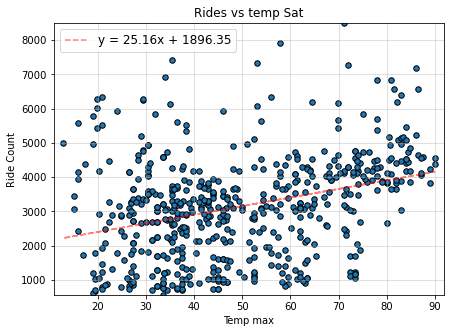

In [58]:
plt_scat(sat_fullday_2015['temp_max'], sat_fullday_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Sat')

In [59]:
sat_day_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 6)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) & (combined_data_df['Time'] < 16) & (combined_data_df['Time'] > 11)] 

sat_day_2015

,Unnamed: 0,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,...,snow_3h,clouds_all,weather_main,weather_description,Time,Date,Ride_count,Day_of_week,Month,Year
5027,5027,22.08,15.76,17.02,22.35,1038,38,4.70,0.0,0.0,...,0.0,1,Clear,sky is clear,12,2015-01-11,2699,6,1,2015
5028,5028,22.21,17.67,17.02,22.98,1039,38,3.36,0.0,0.0,...,0.0,1,Clear,sky is clear,13,2015-01-11,2904,6,1,2015
5029,5029,24.46,24.46,21.00,24.96,1039,36,0.00,0.0,0.0,...,0.0,1,Clear,sky is clear,14,2015-01-11,2852,6,1,2015
5030,5030,26.96,21.47,22.98,27.39,1039,34,4.70,0.0,0.0,...,0.0,90,Clouds,overcast clouds,15,2015-01-11,2948,6,1,2015
5206,5206,33.12,27.70,28.02,33.51,1019,89,5.82,0.0,0.0,...,0.0,90,Mist,mist,13,2015-01-18,4575,6,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,9056,80.55,80.69,80.04,82.90,1018,44,3.36,0.0,0.0,...,0.0,1,Clear,sky is clear,15,2015-06-14,4468,6,6,2015
9263,9263,77.72,78.91,77.43,82.00,1006,79,8.05,0.0,0.0,...,0.0,75,Clouds,broken clouds,15,2015-06-21,4400,6,6,2015
9443,9443,63.28,63.64,62.04,63.39,1005,92,5.82,0.0,0.0,...,0.0,90,Mist,mist,13,2015-06-28,4245,6,6,2015
9444,9444,63.37,63.64,62.94,64.00,1005,90,5.82,0.0,0.0,...,0.0,90,Rain,light rain,14,2015-06-28,4192,6,6,2015


The r-value is: 0.5129626236382996


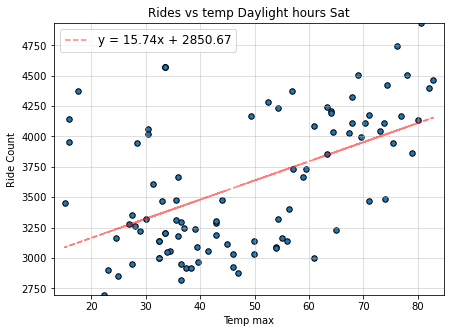

In [60]:
plt_scat(sat_day_2015['temp_max'], sat_day_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours Sat')

In [62]:
wed_fullday_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 3)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0)] 

wed_day_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 6)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) & (combined_data_df['Time'] < 16) & (combined_data_df['Time'] > 11)] 


The r-value is: 0.238675411874138


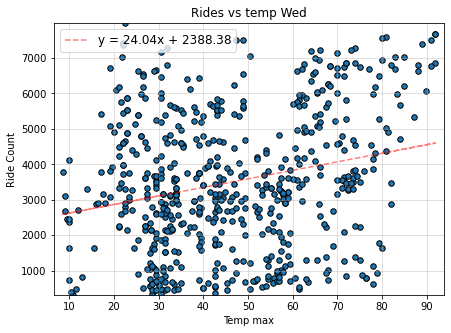

In [69]:
plt_scat(wed_fullday_2015['temp_max'], wed_fullday_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Wed')

The r-value is: 0.5129626236382996


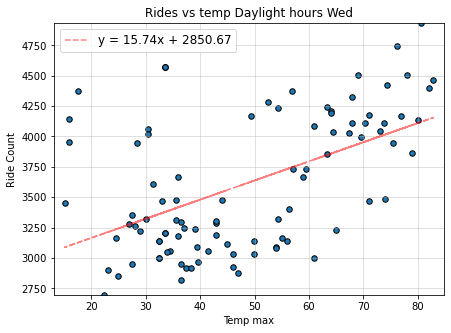

In [70]:
plt_scat(wed_day_2015['temp_max'], wed_day_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours Wed')

In [67]:
one_pm_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) 
                                   &(combined_data_df['Time'] == 14)] 

The r-value is: 0.4727117755602199


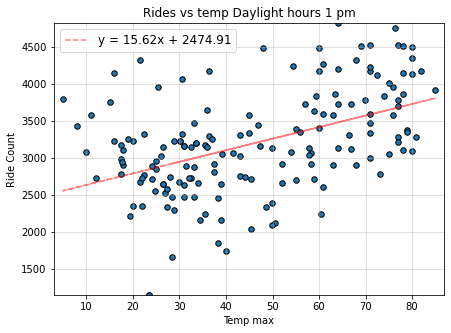

In [71]:
plt_scat(one_pm_2015['temp_max'],one_pm_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours 1 pm')